In [22]:
import random
import matplotlib.pyplot as plt

In [23]:
class RBNode:

    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None
        self.parent = None
        self.colour = "R"

    def get_uncle(self):
        return

    def is_leaf(self):
        return self.left == None and self.right == None

    def is_left_child(self):
        return self == self.parent.left

    def is_right_child(self):
        return not self.is_left_child()

    def is_red(self):
        return self.colour == "R"

    def is_black(self):
        return not self.is_red()

    def make_black(self):
        self.colour = "B"

    def make_red(self):
        self.colour = "R"

    def get_brother(self):
        if self.parent.right == self:
            return self.parent.left
        return self.parent.right

    def get_uncle(self):
        return self.parent.get_brother()

    def uncle_is_black(self):
        if self.get_uncle() == None:
            return True
        return self.get_uncle().is_black()
    
    def __str__(self):
        return "(" + str(self.value) + "," + self.colour + ")"

    def __repr__(self):
         return "(" + str(self.value) + "," + self.colour + ")"


#left and right rotate functions are defined as methods of the RBTree class with the node as the functional parameter.
#I tried to implement the left and right rotate functions as methods of the RBNode class but it was not working as expected.
#On implementing the functions as methods of the RBTree class, the functions worked as expected.

                    
        
    

In [24]:
class RBTree:

    def __init__(self):
        self.root = None

    def is_empty(self,):
        return self.root == None

    def get_height(self,):
        if self.is_empty():
            return 0
        return self.__get_height(self.root)

    def __get_height(self, node):
        if node == None:
            return 0
        return 1 + max(self.__get_height(node.left), self.__get_height(node.right))

    def insert(self, value):
        if self.is_empty():
            self.root = RBNode(value)
            self.root.make_black()
        else:
            self.__insert(self.root, value)

    def __insert(self, node, value):
        if value < node.value:
            if node.left == None:
                node.left = RBNode(value)
                node.left.parent = node
                self.fix(node.left)
            else:
                self.__insert(node.left, value)
        else:
            if node.right == None:
                node.right = RBNode(value)
                node.right.parent = node
                self.fix(node.right)
            else:
                self.__insert(node.right, value)
                
            
    def fix(self, node):
        while node.parent.is_red():
            if node.parent == node.parent.parent.right:
                uncle = node.parent.parent.left
                if uncle is not None and uncle.is_red():
                    uncle.make_black()
                    node.parent.make_black()
                    node.parent.parent.make_red()
                    node = node.parent.parent
                else:
                    if node == node.parent.left:
                        node = node.parent
                        self.right_rotate(node)
                    node.parent.make_black()
                    node.parent.parent.make_red()
                    self.left_rotate(node.parent.parent)
            else:
                uncle = node.parent.parent.right
                if uncle is not None and uncle.is_red():
                    uncle.make_black()
                    node.parent.make_black()
                    node.parent.parent.make_red()
                    node = node.parent.parent
                else:
                    if node == node.parent.right:
                        node = node.parent
                        self.left_rotate(node)
                    node.parent.make_black()
                    node.parent.parent.make_red()
                    self.right_rotate(node.parent.parent)
            if node == self.root:
                break
        self.root.make_black()


    def right_rotate(self, node):
        x = node.left
        node.left = x.right
        if x.right is not None:
            x.right.parent = node
        x.parent = node.parent
        if node.parent is None:
            self.root = x
        elif node == node.parent.right:
            node.parent.right = x
        else:
            node.parent.left = x
        x.right = node
        node.parent = x

    def left_rotate(self, node):
        x = node.right
        node.right = x.left
        if x.left is not None:
            x.left.parent = node
        x.parent = node.parent
        if node.parent is None:
            self.root = x
        elif node == node.parent.left:
            node.parent.left = x
        else:
            node.parent.right = x
        x.left = node
        node.parent = x

        
        
        
    def search(self, value):
        if self.is_empty():
            return None
        return self.__search(self.root, value)

    def __search(self, node, value):
        if node is None or node.value == value:
            return node
        elif value < node.value:
            return self.__search(node.left, value)
        else:
            return self.__search(node.right, value)

    def __str__(self):
        if self.is_empty():
            return "[]"
        return "[" + self.__str_helper(self.root) + "]"

    def __str_helper(self, node):
        if node is None:
            return ""
        if node.is_leaf():
            return str(node)
        if node.left is None:
            return str(node) + " -> " + self.__str_helper(node.right)
        if node.right is None:
            return self.__str_helper(node.left) + " <- " + str(node)
        return self.__str_helper(node.left) + " <- " + str(node) + " -> " + self.__str_helper(node.right)

        


In [25]:
class BSTNode:
    def __init__(self, key):
        self.key = key
        self.left = None
        self.right = None

    def is_leaf(self):
        return self.left is None and self.right is None


class BST:
    def __init__(self):
        self.root = None

    def get_height(self):
        return self._get_height(self.root)

    def _get_height(self, node):
        if node is None:
            return -1
        else:
            left_height = self._get_height(node.left)
            right_height = self._get_height(node.right)
            return max(left_height, right_height) + 1
        
        
    def insertNode(self, key):
        if self.root is None:
            self.root = BSTNode(key)
        else:
            self._insert(self.root, key)

    def _insert(self, node, key):
        if key < node.key:
            if node.left is None:
                node.left = BSTNode(key)
            else:
                self._insert(node.left, key)
        else:
            if node.right is None:
                node.right = BSTNode(key)
            else:
                self._insert(node.right, key)
                
    def __str__(self):
        if self.is_empty():
            return "[]"
        return "[" + self.__str_helper(self.root) + "]"

    def __str_helper(self, node):
        if node.is_leaf():
            return "[" + str(node) + "]"
        if node.left == None:
            return "[" + str(node) + " -> " + self.__str_helper(node.right) + "]"
        if node.right == None:
            return "[" +  self.__str_helper(node.left) + " <- " + str(node) + "]"
        return "[" + self.__str_helper(node.left) + " <- " + str(node) + " -> " + self.__str_helper(node.right) + "]"


Experiment 1: Average BST Height = 31.3, Average RBT Height = 16.1
Experiment 2: Average BST Height = 29.2, Average RBT Height = 16.1
Experiment 3: Average BST Height = 30.6, Average RBT Height = 16.1
Experiment 4: Average BST Height = 31.8, Average RBT Height = 16.1
Experiment 5: Average BST Height = 30.5, Average RBT Height = 16.1
Experiment 6: Average BST Height = 31.2, Average RBT Height = 16.3
Experiment 7: Average BST Height = 29.1, Average RBT Height = 16.3
Experiment 8: Average BST Height = 31.1, Average RBT Height = 16.1
Experiment 9: Average BST Height = 30.8, Average RBT Height = 16.0
Experiment 10: Average BST Height = 29.1, Average RBT Height = 16.3


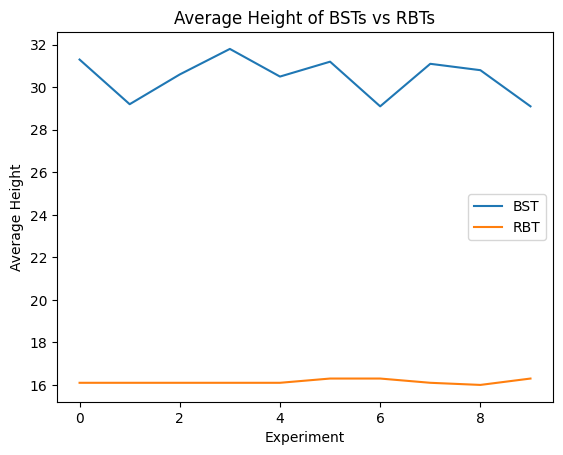

In [26]:

def generate_list(length):
    return [random.randint(1, 100000) for _ in range(length)]

def construct_BST(elements):
    bst = BST()
    for element in elements:
        bst.insertNode(element)
    return bst

def construct_RBT(elements):
    rbt = RBTree()
    for element in elements:
        rbt.insert(element)
    return rbt

def experiment(num_lists, list_length):
    bst_heights = []
    rbt_heights = []

    for _ in range(num_lists):
        elements = generate_list(list_length)
        bst = construct_BST(elements)
        rbt = construct_RBT(elements)

        bst_heights.append(bst.get_height())
        rbt_heights.append(rbt.get_height())

    avg_bst_height = sum(bst_heights) / num_lists
    avg_rbt_height = sum(rbt_heights) / num_lists

    return avg_bst_height, avg_rbt_height

def plot_results(avg_bst_heights, avg_rbt_heights):
    plt.plot(avg_bst_heights, label='BST')
    plt.plot(avg_rbt_heights, label='RBT')
    plt.xlabel('Experiment')
    plt.ylabel('Average Height')
    plt.title('Average Height of BSTs vs RBTs')
    plt.legend()
    plt.show()

def main():
    num_lists = 10
    list_length = 10000

    avg_bst_heights = []
    avg_rbt_heights = []

    for i in range(num_lists):
        avg_bst_height, avg_rbt_height = experiment(num_lists, list_length)
        avg_bst_heights.append(avg_bst_height)
        avg_rbt_heights.append(avg_rbt_height)
        print(f'Experiment {i+1}: Average BST Height = {avg_bst_height}, Average RBT Height = {avg_rbt_height}')

    plot_results(avg_bst_heights, avg_rbt_heights)

if __name__ == "__main__":
    main()

REFLECTION:
The code provides a practical demonstration of the advantages of using Red-Black Trees over standard Binary Search Trees, especially in scenarios where balanced trees are crucial for maintaining efficient performance.
From the graph, we can see that on average, the height of a BST is much greater than that of RBT.
The average height of BST is around twice the average height of RBT.

The average height difference between BSTs and RBTs is important because it shows how good RBTs are in maintaining balanced trees compared to traditional BSTs. If the average height difference favors RBTs, it suggests that RBTs are better than BSTs in terms of maintaining balance.

The differences can be leveraged to select between BSTs and RBTs based on the requirement:
If the application requires minimal height balancing and needs operations to be performed efficiently, then RBTs may be used because RBTs are self balancing.
However, if memory usage is a concern then BSTs may be chosen, as they have simpler structures and require less memory,
